In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
#Generating synthetic time series data
np.random.seed(0)
time_series_data = np.random.randn(100,50) #100 time series each of length 50

#standardazing the dataset
scaler = StandardScaler()
time_series_data_scaled = scaler.fit_transform(time_series_data)

#clustering using K means
Kmeans = KMeans(n_clusters =3, random_state=0)
labels = Kmeans.fit_predict(time_series_data_scaled)

#Display cluster labels
print(labels)

[2 2 1 2 0 1 2 0 0 2 2 1 1 2 1 2 2 0 2 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 2
 1 1 0 1 1 2 0 1 1 0 1 2 2 2 1 1 0 0 1 0 0 1 2 2 2 0 1 1 2 1 2 0 1 1 2 2 2
 2 2 0 2 1 0 2 0 1 2 2 0 0 0 1 2 0 1 1 0 0 2 0 2 2 2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [7]:
!pip install tslearn


Defaulting to user installation because normal site-packages is not writeable


In [10]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans

# Generating synthetic time series data
np.random.seed(0)
time_series_data = np.random.randn(10, 100)  # 10 time series, each of length 100

# Extracting subsequences
window_size = 20
subsequences = [time_series_data[i, j:j+window_size] 
                for i in range(time_series_data.shape[0]) 
                for j in range(time_series_data.shape[1] - window_size + 1)]
subsequences = np.array(subsequences)

# Standardizing the subsequences
scaler = StandardScaler()
subsequences_scaled = scaler.fit_transform(subsequences)

# Clustering using k-Means
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(subsequences_scaled)

# Display cluster labels for the first time series
print(labels[:time_series_data.shape[1] - window_size + 1])

[0 2 1 0 1 0 2 1 0 1 0 2 2 2 1 0 1 0 2 2 2 1 1 0 1 0 2 2 1 1 1 0 2 2 2 1 0
 1 0 2 0 2 1 0 1 1 0 1 0 1 1 0 2 0 2 1 0 1 0 2 1 0 1 0 2 1 2 2 2 2 1 0 1 0
 2 0 2 1 0 1 2]


In [11]:
import numpy as np
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans

# Generating synthetic time series data
np.random.seed(0)
time_series_data = np.random.randn(20, 50)  # 20 time series, each of length 50

# Converting to time series dataset
time_series_dataset = to_time_series_dataset(time_series_data)

# Standardizing the data
scaler = TimeSeriesScalerMeanVariance()
time_series_dataset_scaled = scaler.fit_transform(time_series_dataset)

# Clustering using TimeSeriesKMeans with DTW metric
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", random_state=0)
labels = model.fit_predict(time_series_dataset_scaled)

# Display cluster labels
print(labels)

[1 0 1 2 1 0 2 2 1 1 1 1 0 0 2 2 0 0 0 1]


Example 4: Clustering Time Series Data Using DTW and Evaluating with Silhouette Score

Silhouette Score: 0.16666666666666666


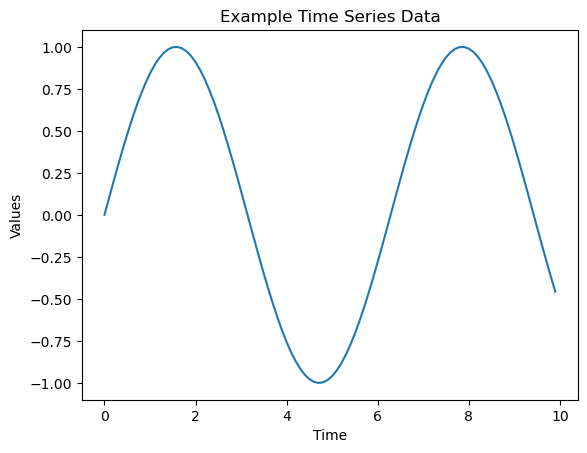

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tslearn.metrics import cdist_dtw
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score

# Generate example time series data
time = np.arange(0, 10, 0.1)
values = np.sin(time)
data = np.array([values, values + 0.1, values - 0.1])

# Normalize the time series data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)

# Compute DTW distance matrix
distance_matrix = cdist_dtw(normalized_data)

# K-Means clustering with DTW as the metric
kmeans = TimeSeriesKMeans(n_clusters=2, metric="dtw")
clusters = kmeans.fit_predict(normalized_data)

# Evaluate clusters using silhouette score with precomputed distance matrix
score = silhouette_score(distance_matrix, clusters, metric="precomputed")
print(f'Silhouette Score: {score}')

# Plot example time series data
plt.plot(time, values)
plt.title('Example Time Series Data')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()